In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, tnrange
import matplotlib.pyplot as plt


In [2]:
dp = "/data/data/UsedCarPrice"

In [3]:
%time data = pd.read_csv(f"{dp}/used_car_train_20200313.csv", sep=" ")
data.head()


CPU times: user 735 ms, sys: 101 ms, total: 836 ms
Wall time: 836 ms


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [4]:
%time test = pd.read_csv(f"{dp}/used_car_testA_20200313.csv", sep=" ")
test.head()


CPU times: user 257 ms, sys: 21.4 ms, total: 279 ms
Wall time: 277 ms


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,...,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
1,150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,...,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
2,150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,...,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
3,150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,...,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
4,150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,...,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [5]:
data.iloc[0]

SaleID                       0
name                       736
regDate               20040402
model                       30
brand                        6
bodyType                     1
fuelType                     0
gearbox                      0
power                       60
kilometer                 12.5
notRepairedDamage          0.0
regionCode                1046
seller                       0
offerType                    0
creatDate             20160404
price                     1850
v_0                    43.3578
v_1                    3.96634
v_2                  0.0502571
v_3                    2.15974
v_4                    1.14379
v_5                   0.235676
v_6                   0.101988
v_7                   0.129549
v_8                  0.0228164
v_9                  0.0974618
v_10                   -2.8818
v_11                    2.8041
v_12                  -2.42082
v_13                  0.795292
v_14                  0.914762
Name: 0, dtype: object

In [6]:
data["regDate"].apply(lambda x: int(x/100)).describe()

count    150000.000000
mean     200341.640093
std         536.498982
min      199100.000000
25%      199909.000000
50%      200309.000000
75%      200711.000000
max      201512.000000
Name: regDate, dtype: float64

In [7]:
test["regDate"].apply(lambda x: int(x/100)).describe()

count     50000.000000
mean     200339.200520
std         536.887059
min      199100.000000
25%      199909.000000
50%      200309.000000
75%      200711.000000
max      201512.000000
Name: regDate, dtype: float64

In [8]:
data["creatDate"].apply(lambda x: int(x/100)).describe()

count    150000.000000
mean     201603.149580
std           1.082904
min      201506.000000
25%      201603.000000
50%      201603.000000
75%      201603.000000
max      201604.000000
Name: creatDate, dtype: float64

In [9]:
test["creatDate"].apply(lambda x: int(x/100)).describe()

count     50000.000000
mean     201603.153120
std           0.815529
min      201506.000000
25%      201603.000000
50%      201603.000000
75%      201603.000000
max      201604.000000
Name: creatDate, dtype: float64

In [10]:
for i in range(0, 15):
    print(f"v_{i}", pd.value_counts(pd.isna(data[f"v_{i}"])))

v_0 False    150000
Name: v_0, dtype: int64
v_1 False    150000
Name: v_1, dtype: int64
v_2 False    150000
Name: v_2, dtype: int64
v_3 False    150000
Name: v_3, dtype: int64
v_4 False    150000
Name: v_4, dtype: int64
v_5 False    150000
Name: v_5, dtype: int64
v_6 False    150000
Name: v_6, dtype: int64
v_7 False    150000
Name: v_7, dtype: int64
v_8 False    150000
Name: v_8, dtype: int64
v_9 False    150000
Name: v_9, dtype: int64
v_10 False    150000
Name: v_10, dtype: int64
v_11 False    150000
Name: v_11, dtype: int64
v_12 False    150000
Name: v_12, dtype: int64
v_13 False    150000
Name: v_13, dtype: int64
v_14 False    150000
Name: v_14, dtype: int64


In [11]:
data.shape, test.shape


((150000, 31), (50000, 30))

In [12]:


def fdatetime(t):
    t = t if t%1000 >= 100 else t+100
    return pd.to_datetime(t, format='%Y%m%d')


def fvar(dt, vl0=None, vl1=None):
    val, nval = [], []
    top = 1000
    cut1, cut2 = 0.10, 0.50
    dt = dt.copy()
    
    dt["t1"] = dt["regDate"].apply(fdatetime)
    dt["t2"] = dt["creatDate"].apply(fdatetime)
    dt["t3"] = datetime.datetime(2017,1,1)
    
    dt["t1y"] = dt["t1"].apply(lambda x: x.year)
    dt["t2y"] = dt["t2"].apply(lambda x: x.year)
    dt["t1m"] = dt["t1"].apply(lambda x: x.month)
    dt["t2m"] = dt["t2"].apply(lambda x: x.month)
    dt["t1w"] = dt["t1"].apply(lambda x: x.weekday())
    dt["t2w"] = dt["t2"].apply(lambda x: x.weekday())
    
    dt["t21"] = [(d1-d2).days for d1, d2 in zip(dt["t2"], dt["t1"])]
    dt["tN1"] = [(d1-d2).days for d1, d2 in zip(dt["t3"], dt["t1"])]
    dt["tN2"] = [(d1-d2).days for d1, d2 in zip(dt["t3"], dt["t2"])]
    val.extend(["t21", "tN1", "tN2"])
    
    for i in tnrange(0, 15):
        val.append(f"v_{i}")
        
        dmax, dmin, dmed, davg = dt[f"v_{i}"].max(), dt[f"v_{i}"].min(), dt[f"v_{i}"].median(), dt[f"v_{i}"].mean()
        dt[f"f_v_{i}"] = dt[f"v_{i}"].apply(lambda x: (x-dmin)/(dmax-dmin))
        dt[f"l_v_{i}"] = dt[f"v_{i}"].apply(lambda x: np.log(x))
        dt[f"m1_v_{i}"] = dt[f"v_{i}"].apply(lambda x: 1 if x > dmed else 0)
        dt[f"m2_v_{i}"] = dt[f"v_{i}"].apply(lambda x: 1 if x > davg else 0)
        val.extend([f"f_v_{i}", f"l_v_{i}", f"m1_v_{i}", f"m2_v_{i}"])
    
    for i in tqdm(["power", "kilometer"]):
        val.append(i)
        
        dmax, dmin, dmed, davg = dt[i].max(), dt[i].min(), dt[i].median(), dt[i].mean()
        dt[f"f_{i}"] = dt[i].apply(lambda x: (x-dmin)/(dmax-dmin))
        dt[f"l_{i}"] = dt[i].apply(lambda x: np.log(x))
        dt[f"m1_{i}"] = dt[i].apply(lambda x: 1 if x > dmed else 0)
        dt[f"m2_{i}"] = dt[i].apply(lambda x: 1 if x > davg else 0)
        val.extend([f"f_{i}", f"l_{i}", f"m1_{i}", f"m2_{i}"])
        
    il = [
        "model", "brand", "bodyType", "fuelType",
        "gearbox", "notRepairedDamage", "regionCode", "seller",
        "t1y", "t2y", "t1m", "t2m", "t1w", "t2w"
    ]
    for i in tqdm(il):
        if i == "notRepairedDamage":
            dt[i] = dt[i].apply(lambda x: {'0.0': 0, '1.0': 1, "-": 2}[x])
        val.append(i)
        
        dt[f"s_{i}"] = 0
        for jk, jv in enumerate(pd.value_counts(dt[i]).head(top).index):
            dt[f"f_{jk}_{i}"] = dt[i].apply(lambda x: 1 if x == jv else 0)
            dt[f"fn_{jk}_{i}"] = dt[i].apply(lambda x: 1 if x != jv else 0)
            dt[f"s_{i}"] = dt[f"s_{i}"] + dt[f"f_{jk}_{i}"]
            
            val.extend([f"f_{jk}_{i}", f"fn_{jk}_{i}"])
        
        dt[f"o_{i}"] = dt[f"s_{i}"].apply(lambda x: 0 if x >= 1 else 1)
        val.extend([f"o_{i}", f"s_{i}"])
    
    dt.fillna(-1, inplace=True)
    
    t_ = []
    dt_ = dt[-dt["price"].isna()].copy()
    
    for i in tqdm(val):
        if np.corrcoef(dt_[i], dt_["price"])[:,0][1] > cut1:
            t_.append(i)
    
    for i in tqdm(t_):
        for j in t_:
            if i != j:
                dt_[f"{i}@1{j}"] = dt_[i] * dt_[j]
                if np.corrcoef(dt_[f"{i}@1{j}"], dt_["price"])[:,0][1] > cut2:
                    nval.append(f"{i}@1{j}")

                dt_[f"{i}@2{j}"] = dt_[i] + dt_[j]
                if np.corrcoef(dt_[f"{i}@2{j}"], dt_["price"])[:,0][1] > cut2:
                    nval.append(f"{i}@2{j}")

    del dt_
    
    for ij in tqdm(nval):
        for ito in ["@1", "@2"]:
            if ito in ij:
                [i, j] = ij.split(ito)
                dt[f"{i}{ito}{j}"] = dt[i] * dt[j]
    
    return val, nval, dt

# ERROR test train is not match !!! Score 1000+ 
# > HOW ABOUT JOIN THEM IN TOGETHER.
d_ = pd.concat([data.sample(75000), test], sort=False)
%time dval, dnval, d_ = fvar(d_)
data_, test_ = d_[d_["price"] > 0], d_[d_["price"] < 0]
del d_
print(data_.shape, test_.shape)
len(dval), len(dnval)



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2870 [00:00<?, ?it/s]/data/soft/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
  2%|▏         | 60/2870 [00:00<00:04, 593.37it/s]/data/soft/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/data/soft/py3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 72/72 [00:00<00:00, 715.86it/s]


CPU times: user 5min 14s, sys: 5min 5s, total: 10min 19s
Wall time: 10min 17s
(75000, 2951) (50000, 2951)


(2870, 72)

In [13]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 46467 to 93599
Columns: 2951 entries, SaleID to f_84_model@2f_v_12
dtypes: datetime64[ns](3), float64(127), int64(2821)
memory usage: 1.6 GB


In [14]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Columns: 2951 entries, SaleID to f_84_model@2f_v_12
dtypes: datetime64[ns](3), float64(127), int64(2821)
memory usage: 1.1 GB


In [15]:
%time data_.isna().values.any()


CPU times: user 175 ms, sys: 356 ms, total: 531 ms
Wall time: 529 ms


False

In [16]:
%time test_.isna().values.any()


CPU times: user 98.9 ms, sys: 258 ms, total: 357 ms
Wall time: 356 ms


False

In [17]:
%time data_.isnull().values.any()


CPU times: user 149 ms, sys: 384 ms, total: 532 ms
Wall time: 530 ms


False

In [18]:
%time test_.isnull().values.any()


CPU times: user 110 ms, sys: 248 ms, total: 358 ms
Wall time: 356 ms


False

/data/soft/py3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


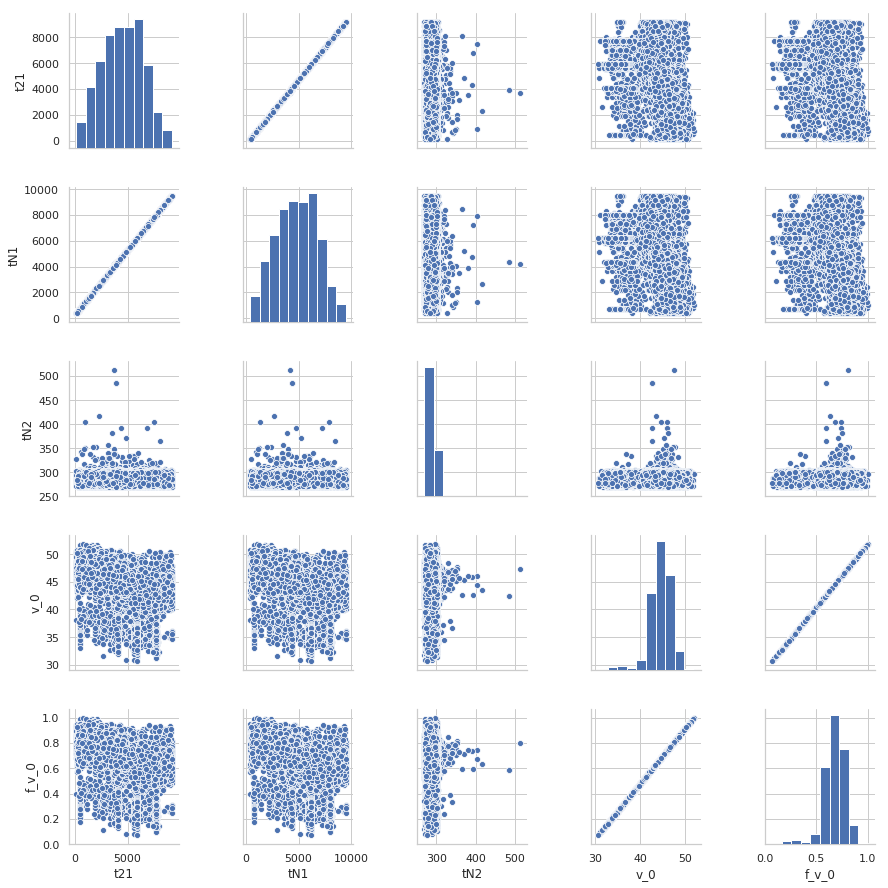

In [19]:
cols = dval[:5]

sns.set(style='whitegrid', context='notebook')
sns.pairplot(data_[cols], size=2.5)
plt.tight_layout()
plt.savefig('../outs/seaborn001.png')
plt.show()


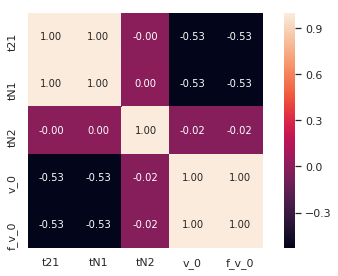

In [20]:

cm = np.corrcoef(data_[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(
    cm,cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols,
    xticklabels=cols
)
plt.tight_layout()
plt.savefig('../outs/seaborn002.png')
plt.show()


In [21]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics


/data/soft/py3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:

v1l = dnval

%time m = data_.sample(frac=0.3)[v1l + ["price"]]
print(m.shape)
m_y = m[["price"]]
m_x = m[v1l]

X_trai, X_test, y_trai, y_test = train_test_split(m_x, m_y, test_size=0.3)
print(X_trai.shape, X_test.shape, y_trai.shape, y_test.shape)

def xgb_xgbregressor(train_x, train_y):
    import xgboost as xgb
    model = xgb.XGBRegressor(
        n_estimators=100, 
        learning_rate=0.1, 
        gamma=0, 
        subsample=0.8,
        colsample_bytree=0.9, 
        max_depth=7,
        objective='reg:squarederror',
    )
    model.fit(train_x, train_y)
    return model

Xmodel = xgb_xgbregressor
if Xmodel.__name__ == "xgb_xgbregressor":
    print(f"\n>>> {Xmodel.__name__}")
    %time model1 = Xmodel(X_trai, y_trai) 
    %time y_trai_m = [min(max(int(i),10),99999) for i in model1.predict(X_trai)]
    %time y_test_m = [min(max(int(i),10),99999) for i in model1.predict(X_test)]



CPU times: user 733 ms, sys: 340 ms, total: 1.07 s
Wall time: 1.04 s
(22500, 73)
(15750, 72) (6750, 72) (15750, 1) (6750, 1)

>>> xgb_xgbregressor
CPU times: user 25.7 s, sys: 61.6 ms, total: 25.7 s
Wall time: 6.71 s
CPU times: user 293 ms, sys: 10.3 ms, total: 303 ms
Wall time: 76 ms
CPU times: user 129 ms, sys: 4.99 ms, total: 134 ms
Wall time: 33.6 ms


In [23]:

mr1 = metrics.mean_absolute_error(y_trai, y_trai_m)
mr2 = metrics.mean_absolute_error(y_test, y_test_m)
print("%.6f, %.6f, %.6f" % (mr1, mr2, np.mean([mr1, mr2])))


745.173905, 1014.703852, 879.938878


In [24]:
%time m = data_.sample(frac=0.75)[v1l + ["price"]]
print(m.shape)
m_y = m[["price"]]
m_x = m[v1l]

X_trai, X_test, y_trai, y_test = train_test_split(m_x, m_y, test_size=0.5)
%time y_trai_m = [min(max(int(i),10),99999) for i in model1.predict(X_trai)]
%time y_test_m = [min(max(int(i),10),99999) for i in model1.predict(X_test)]

mr1 = metrics.mean_absolute_error(y_trai, y_trai_m)
mr2 = metrics.mean_absolute_error(y_test, y_test_m)
print("%.6f, %.6f, %.6f" % (mr1, mr2, np.mean([mr1, mr2])))


CPU times: user 1.55 s, sys: 859 ms, total: 2.41 s
Wall time: 1.96 s
(56250, 73)
CPU times: user 366 ms, sys: 22.1 ms, total: 388 ms
Wall time: 139 ms
CPU times: user 532 ms, sys: 14 ms, total: 546 ms
Wall time: 137 ms
988.331449, 955.314489, 971.822969


In [25]:
result = pd.DataFrame()
result["SaleID"] = test_.SaleID
result["price"] = [min(max(int(i),10),99999) for i in model1.predict(test_[v1l])]
result.to_csv("../outs/result001.csv",index=False)
result.head()


,SaleID,price
0,150000,37233
1,150001,415
2,150002,6390
3,150003,11378
4,150004,571


In [26]:
# 

In [27]:

v2l = dnval

%time m = data_.sample(frac=0.3)[v2l + ["price"]]
print(m.shape)
m_y = m[["price"]]
m_x = m[v2l]

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


def tf_model():
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=[len(v2l)]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.01)
    model.compile(loss='mae', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model2 = tf_model()
print(model2.summary())


# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('>', end='')
        if epoch % 100 == 0: 
            print('')
        

# 
EPOCHS = 1000

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

%time history = model2.fit(m_x,m_y,epochs=EPOCHS,validation_split=0.2,verbose=0,callbacks=[early_stop, PrintDot()])


CPU times: user 706 ms, sys: 317 ms, total: 1.02 s
Wall time: 1.02 s
(22500, 73)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               37376     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 70,273
Trainable params: 70,273
Non-trainable params: 0
_________________________________________________________________
None
>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>CPU times: user 1min 26s, sys: 9.13 s, total: 1min 35s
Wall time: 55.5 s


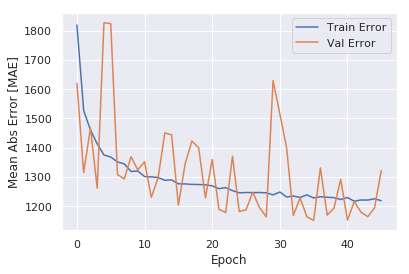

In [28]:
import matplotlib.pyplot as plt


def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MAE]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()

plot_history(history)


In [29]:
%time m = data_.sample(frac=0.3)[v2l + ["price"]]
print(m.shape)
m_y = m[["price"]]
m_x = m[v2l]

X_trai, X_test, y_trai, y_test = train_test_split(m_x, m_y, test_size=0.3)
%time y_trai_m = [min(max(int(i),10),99999) for i in model2.predict(X_trai)[:,0]]
%time y_test_m = [min(max(int(i),10),99999) for i in model2.predict(X_test)[:,0]]

mr1 = metrics.mean_absolute_error(y_trai, y_trai_m)
mr2 = metrics.mean_absolute_error(y_test, y_test_m)
print("%.6f, %.6f, %.6f" % (mr1, mr2, np.mean([mr1, mr2])))


CPU times: user 762 ms, sys: 356 ms, total: 1.12 s
Wall time: 1.03 s
(22500, 73)
CPU times: user 413 ms, sys: 44.5 ms, total: 458 ms
Wall time: 357 ms
CPU times: user 169 ms, sys: 13.9 ms, total: 183 ms
Wall time: 142 ms
1312.917460, 1329.149185, 1321.033323


In [30]:
result = pd.DataFrame()
result["SaleID"] = test_.SaleID
result["price"] = [min(max(int(i),10),99999) for i in model2.predict(test_[v2l])[:,0]]
result.to_csv("../outs/result002.csv",index=False)
result.head()


,SaleID,price
0,150000,27750
1,150001,267
2,150002,5813
3,150003,9941
4,150004,470


In [31]:
# 